In [1]:
import numpy as np
import pandas as pd

In [2]:
# Set the random seed for reporducibility
np.random.seed(123)

# Create a dataframe with two classes
n_samples=1000
class_0_ratio=0.9
n_class_0=int(n_samples*class_0_ratio)
n_class_1=n_samples-n_class_0

In [3]:
n_class_0,n_class_1

(900, 100)

In [4]:
## create dataframe with imbalanced dataset. Here loc stands for mean and scale for std.

class_0=pd.DataFrame({
    "feature_1":np.random.normal(loc=0,scale=1,size=n_class_0),
    "feature_2":np.random.normal(loc=0,scale=1,size=n_class_0),
    "target":[0]*n_class_0
})

class_1=pd.DataFrame({
    "feature_1":np.random.normal(loc=2,scale=1,size=n_class_1),
    "feature_2":np.random.normal(loc=2,scale=1,size=n_class_1),
    "target":[1]*n_class_1
})

In [5]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [6]:
df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [7]:
df["target"].value_counts()

0    900
1    100
Name: target, dtype: int64

# upsampling

In [8]:
df_minority=df[df["target"]==1]
df_majority=df[df["target"]==0]

In [9]:
# resemple is used to create more minority points to balance with majority
from sklearn.utils import resample

# first argument is for which sample upscaling is to performed 
# replace =True specify sample with replacement
df_minority_upsampled=resample(df_minority,replace=True,
        n_samples=len(df_majority), # How much we have to increace
        random_state=42
        )

In [10]:
df_minority_upsampled.shape

(900, 3)

In [11]:
df_minority_upsampled.head()

,feature_1,feature_2,target
951,1.125854,1.843917,1
992,2.196570,1.397425,1
914,1.932170,2.998053,1
971,2.272825,3.034197,1
960,2.870056,1.550485,1


In [12]:
df_upsampled=pd.concat([df_majority,df_minority_upsampled])

In [13]:
df_upsampled

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
5,1.651437,-0.116932,0
6,-2.426679,-0.102391,0
7,-0.428913,-2.272618,0
8,1.265936,-0.642610,0
9,-0.866740,0.299885,0


In [14]:
df_upsampled["target"].value_counts()

1    900
0    900
Name: target, dtype: int64

# Down sampling

In [15]:
n_samples=1000
class_0_ratio=0.9
n_class_0=int(n_samples*class_0_ratio)
n_class_1=n_samples-n_class_0


class_0=pd.DataFrame({
    "feature_1":np.random.normal(loc=0,scale=1,size=n_class_0),
    "feature_2":np.random.normal(loc=0,scale=1,size=n_class_0),
    "target":[0]*n_class_0
})

class_1=pd.DataFrame({
    "feature_1":np.random.normal(loc=2,scale=1,size=n_class_1),
    "feature_2":np.random.normal(loc=2,scale=1,size=n_class_1),
    "target":[1]*n_class_1
})

In [16]:
print(df["target"].value_counts())

0    900
1    100
Name: target, dtype: int64


In [17]:
df_minority=df[df["target"]==1]
df_majoirty=df[df["target"]==0]

In [18]:
from sklearn.utils import resample

df_majority_downsampled=resample(df_majority,replace=False,
                                n_samples=len(df_minority),
                                 random_state=42
                                )

In [19]:
df_majority_downsampled.shape

(100, 3)

In [20]:
df_downsampled=pd.concat([df_minority,df_majority_downsampled])

In [21]:
df_downsampled.target.value_counts()

1    100
0    100
Name: target, dtype: int64

In [22]:
# Downsampling is bad because we are loosing data points.

# SMOTE

In [23]:
from sklearn.datasets import make_classification

In [24]:
X,y=make_classification(n_samples=1000, n_redundant=0, n_features=2, n_clusters_per_class=1,
                       weights=[0,90],random_state=2)

In [25]:
import pandas as pd
df1=pd.DataFrame(X, columns=["f1","f2"])
df2=pd.DataFrame(y, columns=["target"])

final_df=pd.concat([df1,df2],axis=1)
final_df.head()

,f1,f2,target
0,0.625831,1.025010,1
1,-1.989975,0.171844,1
2,1.770946,1.178256,1
3,2.034929,1.137721,1
4,0.654142,0.945824,1


In [26]:
final_df["target"].value_counts()

1    992
0      8
Name: target, dtype: int64

In [27]:
import matplotlib.pyplot as plt
plt.scatter(final_df["f1"],final_df["f2"],c=final_df["target"])

In [28]:
pip install imblearn


The following command must be run outside of the IPython shell:

    $ pip install imblearn

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [29]:
!pip install imblearn

In [30]:
!pip install imbalanced-learn

In [31]:
!pip install numpy --user

In [32]:
numpy -v

NameError: name 'numpy' is not defined

In [33]:
import imblearn

In [34]:
print(imblearn.__version__)

0.10.1


In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
oversample=SMOTE()
X,y=oversample.fit_resample(final_df[["f1","f2"]],final_df["target"])

In [37]:
X.shape

(1984, 2)

In [38]:
y.shape

(1984,)

In [39]:
len(y[y==1])

992

In [40]:
len(X[X==1])

1984

In [41]:
df1=pd.DataFrame(X,columns=["f1","f2"])
df2=pd.DataFrame(y,columns=["target"])
oversample_df=pd.concat([df1,df2],axis=1)

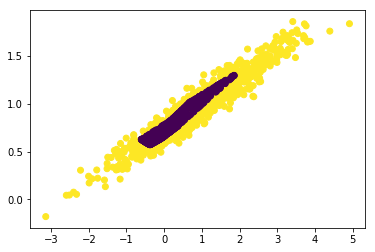

In [42]:
plt.scatter(oversample_df["f1"],oversample_df["f2"],c=oversample_df["target"])

# Interpolation

Linear Interpolation

In [43]:
import numpy as np
x=np.array([1,2,3,4,5])
y=np.array([2,4,6,8,10])

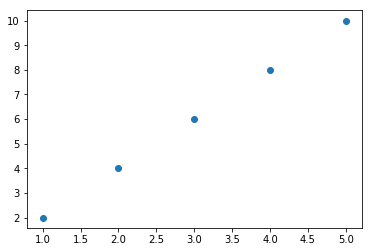

In [44]:
import matplotlib.pyplot as plt

plt.scatter(x,y)

In [45]:
# We can easily plot more points using same path and relationship therefore we wil
# use linear IP technique
# create new x values
x_new=np.linspace(1,5,10) 
# one d LIP for monotonically increasing sample points.
y_interp=np.interp(x_new,x,y)

In [46]:
y_interp

array([ 2.        ,  2.88888889,  3.77777778,  4.66666667,  5.55555556,
        6.44444444,  7.33333333,  8.22222222,  9.11111111, 10.        ])

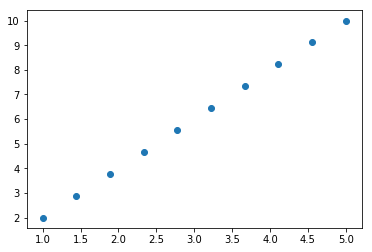

In [47]:
plt.scatter(x_new,y_interp)

Cubic IP with Scipy

our chart will be little curved shape

In [48]:
import numpy as np
x=np.array([1,2,3,4,5])
y=np.array([1,8,27,64,125])

In [49]:
from scipy.interpolate import interp1d

In [50]:
# create a cubic IP function
f=interp1d(x,y,kind="cubic")

In [51]:
# interpolate the data

x_new=np.linspace(1,5,10)
y_interp=f(x_new)

In [52]:
y_interp

array([  1.        ,   3.01371742,   6.739369  ,  12.7037037 ,
        21.43347051,  33.45541838,  49.2962963 ,  69.48285322,
        94.54183813, 125.        ])

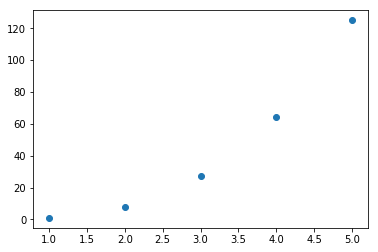

In [53]:
plt.scatter(x,y)

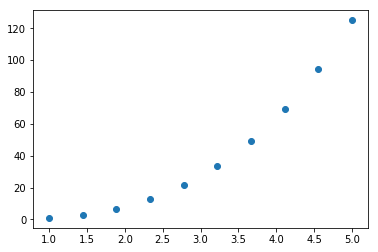

In [54]:
plt.scatter(x_new,y_interp)

Polynomial Interpolation

In [55]:
x=np.array([1,2,3,4,5])
y=np.array([1,4,9,16,25])

In [56]:
# Interpolate data using polynomial interpolation

p=np.polyfit(x,y,2)  # Least squares polynomial fit. Third param is degree of polynomial

In [57]:
x_new=np.linspace(1,5,10)  # Create new x values
y_interp=np.polyval(p,x_new)   # interpolate y values

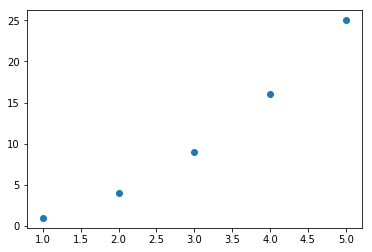

In [58]:
plt.scatter(x,y)

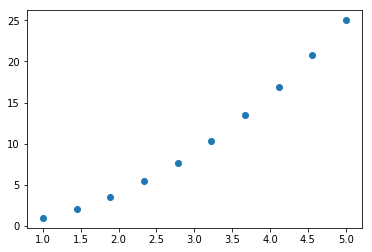

In [59]:
plt.scatter(x_new,y_interp)

# 5 Number Summary and Box Plot

Min, Max, Q1, median, Q3

In [60]:
list_marks=[45,32,65,89,75,68,32,25,67,89,73,54,92,49,76,82,65,68,60,80,76,55]
minimum,Q1,median,Q3,maximum=np.quantile(list_marks,[0,0.25,0.5,0.75,1.0])

In [61]:
minimum, Q1, median, Q3, maximum

(25.0, 54.25, 67.5, 76.0, 92.0)

In [62]:
IQR=Q3-Q1
print(IQR)

21.75


In [63]:
lower_fence=Q1-1.5*(IQR)
higher_fence=Q3+1.5*(IQR)

In [64]:
lower_fence

21.625

In [65]:
higher_fence

108.625

In [66]:
import seaborn as sns

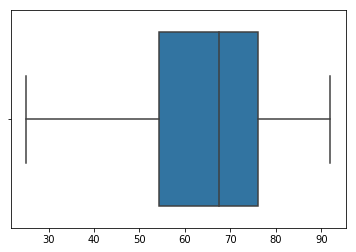

In [67]:
sns.boxplot(list_marks)

Here we don't have any outliers so we can't see them in graph

Now lets add outliers in our list

In [68]:
list_marks=[45,32,65,89,75,68,32,25,67,89,73,54,92,-100,49,76,1,82,65,68,60,80,76,55,343,123]

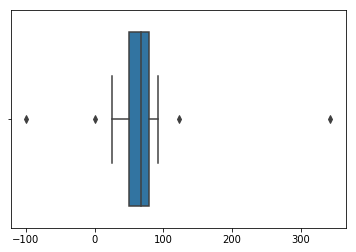

In [69]:
sns.boxplot(list_marks)

# Feature Scaling

1. Standardization
2. Normalization
3. Unit Vector

In [70]:
import seaborn as sns

In [72]:
df=sns.load_dataset("tips")

In [73]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [74]:
import numpy as np

In [75]:
mean=np.mean(df["total_bill"])
std=np.std(df["total_bill"])
print(mean,std)

19.785942622950824 8.88415057777113


In [76]:
normalized_data=[]
for i in list(df["total_bill"]):
    z_score=(i-mean)/std
    normalized_data.append(z_score)

In [77]:
normalized_data

[-0.3147113050904947,
 -1.0632353132988699,
 0.13777989987156108,
 0.4383151031672544,
 0.5407447042905058,
 0.6195367051545452,
 -1.239954515236787,
 0.7985071071171492,
 -0.5342033074974618,
 -0.5634689078183908,
 -1.071114513385274,
 1.7417599174609364,
 -0.49143050702841173,
 -0.15262490331304188,
 -0.5578409077566736,
 0.20193910057513573,
 -1.0643609133112133,
 -0.39350330595453414,
 -0.31696250511518154,
 0.09725829942719756,
 -0.21003050394255615,
 0.056736698982834455,
 -0.45203450659639205,
 2.2100095225958003,
 0.003833498402693769,
 -0.22241210407833414,
 -0.7221785095588132,
 -0.7987193103981659,
 0.2154463007232569,
 -0.01530170180714459,
 -1.152157714274,
 -0.16162970341178906,
 -0.5319521074727749,
 0.10176069947657156,
 -0.22578890411536412,
 0.4810879036363043,
 -0.3912521059298474,
 -0.3214649051645551,
 -0.12335930299211276,
 1.2926455125359113,
 -0.4216433062631197,
 -0.26180810451035363,
 -0.6580193088552382,
 -1.1375249141135357,
 1.1947183114620337,
 -0.16838330

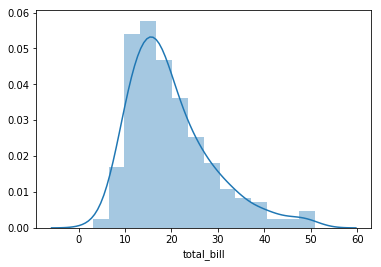

In [81]:
sns.distplot(df["total_bill"])

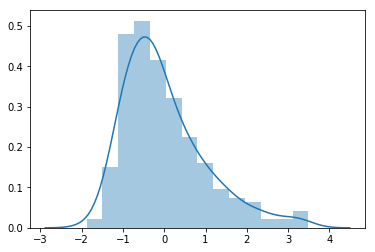

In [82]:
sns.distplot(normalized_data)

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
scaler=StandardScaler()

In [86]:
scaler

StandardScaler()

In [87]:
scaler.fit(df[["total_bill"]])

StandardScaler()

In [88]:
scaler.transform(df[["total_bill"]])

array([[-3.14711305e-01],
       [-1.06323531e+00],
       [ 1.37779900e-01],
       [ 4.38315103e-01],
       [ 5.40744704e-01],
       [ 6.19536705e-01],
       [-1.23995452e+00],
       [ 7.98507107e-01],
       [-5.34203307e-01],
       [-5.63468908e-01],
       [-1.07111451e+00],
       [ 1.74175992e+00],
       [-4.91430507e-01],
       [-1.52624903e-01],
       [-5.57840908e-01],
       [ 2.01939101e-01],
       [-1.06436091e+00],
       [-3.93503306e-01],
       [-3.16962505e-01],
       [ 9.72582994e-02],
       [-2.10030504e-01],
       [ 5.67366990e-02],
       [-4.52034507e-01],
       [ 2.21000952e+00],
       [ 3.83349840e-03],
       [-2.22412104e-01],
       [-7.22178510e-01],
       [-7.98719310e-01],
       [ 2.15446301e-01],
       [-1.53017018e-02],
       [-1.15215771e+00],
       [-1.61629703e-01],
       [-5.31952107e-01],
       [ 1.01760699e-01],
       [-2.25788904e-01],
       [ 4.81087904e-01],
       [-3.91252106e-01],
       [-3.21464905e-01],
       [-1.2

In [90]:
import pandas as pd
pd.DataFrame(scaler.fit_transform(df[["total_bill"]]),columns=["total_bill"])

,total_bill
0,-0.314711
1,-1.063235
2,0.137780
3,0.438315
4,0.540745
5,0.619537
6,-1.239955
7,0.798507
8,-0.534203
9,-0.563469


In [91]:
pd.DataFrame(scaler.fit_transform(df[["total_bill","tip"]]),columns=["total_bill","tip"])

,total_bill,tip
0,-0.314711,-1.439947
1,-1.063235,-0.969205
2,0.137780,0.363356
3,0.438315,0.225754
4,0.540745,0.443020
5,0.619537,1.239659
6,-1.239955,-0.722971
7,0.798507,0.088153
8,-0.534203,-0.751940
9,-0.563469,0.167817


In [92]:
scaler.transform([[13,4]])

C:\Users\DeLL\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[-0.76382571,  0.72546447]])

2. NORMALIZATION - - - - > Min Max Scaler

In [93]:
df=sns.load_dataset("taxis")

In [94]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [95]:
from sklearn.preprocessing import MinMaxScaler

In [96]:
min_max=MinMaxScaler()

In [97]:
min_max.fit_transform(df[["distance","fare","tip"]])

array([[0.04359673, 0.04026846, 0.06475904],
       [0.02152589, 0.02684564, 0.        ],
       [0.0373297 , 0.04362416, 0.07108434],
       ...,
       [0.11280654, 0.10067114, 0.        ],
       [0.03051771, 0.03355705, 0.        ],
       [0.10490463, 0.09395973, 0.10120482]])

3. UNIT VECTOR

In [99]:
from sklearn.preprocessing import normalize

In [100]:
pd.DataFrame(normalize(df[["distance","fare","tip"]]))

,0,1,2
0,0.213461,0.933894,0.286839
1,0.156064,0.987747,0.000000
2,0.171657,0.939731,0.295702
3,0.267899,0.939386,0.213971
4,0.231742,0.965592,0.118017
5,0.062658,0.959053,0.276207
6,0.267399,0.952381,0.146520
7,0.162516,0.986706,0.000000
8,0.234718,0.969910,0.064661
9,0.185269,0.975099,0.121887


# NOMINAL/OHE ENCODING

In [11]:
import pandas as pd

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
## Create a simple dataframe
df=pd.DataFrame({"color":["red","blue","green","yellow","cyan","magenta"]})

In [14]:
df.head()

,color
0,red
1,blue
2,green
3,yellow
4,cyan


In [15]:
## Create an instance of OneHotEncoder
encoder=OneHotEncoder()

In [16]:
## peform fit and transform
encoded=encoder.fit_transform(df[["color"]]).toarray()
encoded

array([[0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

It has sorted first data to alphabetical order then created sparse matrix according to it

In [17]:
encoder_df=pd.DataFrame(encoded, columns=encoder.get_feature_names_out())

In [18]:
encoder_df

,color_blue,color_cyan,color_green,color_magenta,color_red,color_yellow
0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0


In [19]:
pd.concat([df,encoder_df],axis=1)

,color,color_blue,color_cyan,color_green,color_magenta,color_red,color_yellow
0,red,0.0,0.0,0.0,0.0,1.0,0.0
1,blue,1.0,0.0,0.0,0.0,0.0,0.0
2,green,0.0,0.0,1.0,0.0,0.0,0.0
3,yellow,0.0,0.0,0.0,0.0,0.0,1.0
4,cyan,0.0,1.0,0.0,0.0,0.0,0.0
5,magenta,0.0,0.0,0.0,1.0,0.0,0.0


Practice Example

In [20]:
import seaborn as sns
sns.load_dataset("tips")

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [21]:
temp_df=sns.load_dataset("tips")

In [22]:
temp_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [31]:
cat_df=pd.DataFrame()
cat_df[["sex","smoker","day","time"]]=temp_df[["sex","smoker","day","time"]]

In [32]:
cat_df

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner
...,...,...,...,...
239,Male,No,Sat,Dinner
240,Female,Yes,Sat,Dinner
241,Male,Yes,Sat,Dinner
242,Male,No,Sat,Dinner


In [35]:
temp_encoded=encoder.fit_transform(cat_df[["sex"]]).toarray()

In [36]:
temp_encoded

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.

In [37]:
temp_encoded=encoder.fit_transform(cat_df[["time"]]).toarray()

In [38]:
temp_encoded

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [39]:
temp_encoded=encoder.fit_transform(cat_df[["day"]]).toarray()

In [40]:
temp_encoded

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],


In [43]:
cat_df["day"].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [44]:
final_df=pd.Dataframe(encoder,fit_transform(cat_df["day"]))

AttributeError: module 'pandas' has no attribute 'Dataframe'

In [45]:
final_df=pd.DataFrame(temp_encoded, columns=encoder.get_feature_names_out())

In [47]:
final_df

,day_Fri,day_Sat,day_Sun,day_Thur
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
239,0.0,1.0,0.0,0.0
240,0.0,1.0,0.0,0.0
241,0.0,1.0,0.0,0.0
242,0.0,1.0,0.0,0.0


In [50]:
pd.concat([cat_df["day"],final_df],axis=1)

,day,day_Fri,day_Sat,day_Sun,day_Thur
0,Sun,0.0,0.0,1.0,0.0
1,Sun,0.0,0.0,1.0,0.0
2,Sun,0.0,0.0,1.0,0.0
3,Sun,0.0,0.0,1.0,0.0
4,Sun,0.0,0.0,1.0,0.0
...,...,...,...,...,...
239,Sat,0.0,1.0,0.0,0.0
240,Sat,0.0,1.0,0.0,0.0
241,Sat,0.0,1.0,0.0,0.0
242,Sat,0.0,1.0,0.0,0.0


# Label Encoding

In [1]:
import pandas as pd

E:\conda\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
color_df=pd.DataFrame({"color":["red","blue","green","yellow","cyan","magenta"]})

In [3]:
color_df.head()

,color
0,red
1,blue
2,green
3,yellow
4,cyan


In [4]:
# LabelEncoder encode target labels with value between 0 and n_classes-1

from sklearn.preprocessing import LabelEncoder
lbl_encoder=LabelEncoder()

In [5]:
lbl_encoder.fit_transform(color_df[["color"]])

C:\Users\DeLL\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([4, 0, 2, 5, 1, 3])

In [6]:
lbl_encoder.transform([["cyan"]])

C:\Users\DeLL\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1])

# Ordinal Encoding

In [7]:
from sklearn.preprocessing import OrdinalEncoder

In [13]:
df=pd.DataFrame({"size":["small","medium","large","extra large","small","large"]})

In [14]:
df

,size
0,small
1,medium
2,large
3,extra large
4,small
5,large


In [16]:
## create an instance for ordinal Encoder and then fit_transform
ord_encoder=OrdinalEncoder(categories=[["small","medium","large","extra large"]])

In [18]:
ord_encoder.fit_transform(df[["size"]])

array([[0.],
       [1.],
       [2.],
       [3.],
       [0.],
       [2.]])

In [23]:
df=pd.DataFrame({
    "city":["London","India","Paris","Japan","Paris","Bhutan","America","India"],
    "price":[322,434,221,345,233,153,322,765]
})

In [24]:
df

,city,price
0,London,322
1,India,434
2,Paris,221
3,Japan,345
4,Paris,233
5,Bhutan,153
6,America,322
7,India,765


In [25]:
mean_price=df.groupby("city")["price"].mean().to_dict()

In [26]:
mean_price

{'America': 322.0,
 'Bhutan': 153.0,
 'India': 599.5,
 'Japan': 345.0,
 'London': 322.0,
 'Paris': 227.0}

Thus the same city name is replaced by 1 and its price is averaged

In [27]:
df["city_encoded"]=df["city"].map(mean_price)

In [28]:
df

,city,price,city_encoded
0,London,322,322.0
1,India,434,599.5
2,Paris,221,227.0
3,Japan,345,345.0
4,Paris,233,227.0
5,Bhutan,153,153.0
6,America,322,322.0
7,India,765,599.5


In [29]:
df[["price","city_encoded"]]

,price,city_encoded
0,322,322.0
1,434,599.5
2,221,227.0
3,345,345.0
4,233,227.0
5,153,153.0
6,322,322.0
7,765,599.5


Practice Question

In [31]:
import seaborn as sns
sns.load_dataset("tips")

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [34]:
df=sns.load_dataset("tips")

In [35]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [36]:
temp=pd.DataFrame()

In [37]:
temp=df[["time","total_bill"]]

In [38]:
temp

,time,total_bill
0,Dinner,16.99
1,Dinner,10.34
2,Dinner,21.01
3,Dinner,23.68
4,Dinner,24.59
...,...,...
239,Dinner,29.03
240,Dinner,27.18
241,Dinner,22.67
242,Dinner,17.82


In [39]:
sample=temp.groupby("time")["total_bill"].mean().to_dict()

In [40]:
sample

{'Lunch': 17.168676470588235, 'Dinner': 20.79715909090909}

In [42]:
df["time_encoded"]=df["time"].map(sample)

In [43]:
df

,total_bill,tip,sex,smoker,day,time,size,time_encoded
0,16.99,1.01,Female,No,Sun,Dinner,2,20.797159
1,10.34,1.66,Male,No,Sun,Dinner,3,20.797159
2,21.01,3.50,Male,No,Sun,Dinner,3,20.797159
3,23.68,3.31,Male,No,Sun,Dinner,2,20.797159
4,24.59,3.61,Female,No,Sun,Dinner,4,20.797159
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.797159
240,27.18,2.00,Female,Yes,Sat,Dinner,2,20.797159
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.797159
242,17.82,1.75,Male,No,Sat,Dinner,2,20.797159


In [44]:
df[["total_bill","time_encoded"]]

,total_bill,time_encoded
0,16.99,20.797159
1,10.34,20.797159
2,21.01,20.797159
3,23.68,20.797159
4,24.59,20.797159
...,...,...
239,29.03,20.797159
240,27.18,20.797159
241,22.67,20.797159
242,17.82,20.797159
